In [5]:
# just checking the system on which we are working
import sys
print(sys.version)

3.6.9 |Anaconda custom (64-bit)| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [6]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [7]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

%config InlineBackend.rc = {}
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

# standard imports of global libraries
import os
import numpy as np
import astropy
import pandas as pd
import pickle
import scipy
import astropy

# few specific imports from the libraries above
from sklearn.metrics.pairwise import euclidean_distances
from scipy import signal
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

# tqdm is a library for monitoring execution of loop in notebook enviroment
from tqdm import tqdm

# making sure that the notebook does not get swamped with outputs
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})

# if you are not currently in the github directory, provide the path 
# if you are in the github directory executing `os.getcwd()` below will give you the correct path
# for example, on my computer if I wanted to specify explicity the path it would be: MAIN_DIRECTORY='/Users/nevencaplar/Documents/Variability/NonStationarity'
MAIN_DIRECTORY=os.getcwd()
DATA_DIRECTORY=MAIN_DIRECTORY+'/Data/'
FIGURES_PNG_DIRECTORY=MAIN_DIRECTORY+'/Figures_png/'
FIGURES_PDF_DIRECTORY=MAIN_DIRECTORY+'/Figures_pdf/'

# module specific for this work
# if you change somethign autoreload will make sure that changes are immediately active 
%load_ext autoreload
%autoreload 2

from NonStationarity import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Theoretical local DRW 

In [34]:
# delta_t in seconds - that is 100 days
delta_t=8640000
# number of points
num_points=2**24

print('delta_t: '+str(delta_t/(24*3600))+' days')

ER_curve = np.zeros(num_points, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/NonSationarity_nonGithub/Example_results/results_example_results_1.bin', dtype = float)

full_log_Er_curve=np.log10(ER_curve)

delta_t: 100.0 days


In [30]:
#full_log_Er_curve_cut=full_log_Er_curve[full_log_Er_curve>-2]

In [49]:
Edd_bin_len=[]
for i in np.arange(-2,2,0.1):
    Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+0.1)&(full_log_Er_curve_cut>i)]),\
                        np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+0.1)&(full_log_Er_curve_cut>i)]))])   
Edd_bin_len=np.array(Edd_bin_len)      
"""
Edd_bin_len_SDSS=[]
for i in np.arange(-2,2,0.1):
    Edd_bin_len_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]),\
                        np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]))])   
Edd_bin_len_SDSS=np.array(Edd_bin_len_SDSS)    
"""

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


'\nEdd_bin_len_SDSS=[]\nfor i in np.arange(-2,2,0.1):\n    Edd_bin_len_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]),                        np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]))])   \nEdd_bin_len_SDSS=np.array(Edd_bin_len_SDSS)    \n'

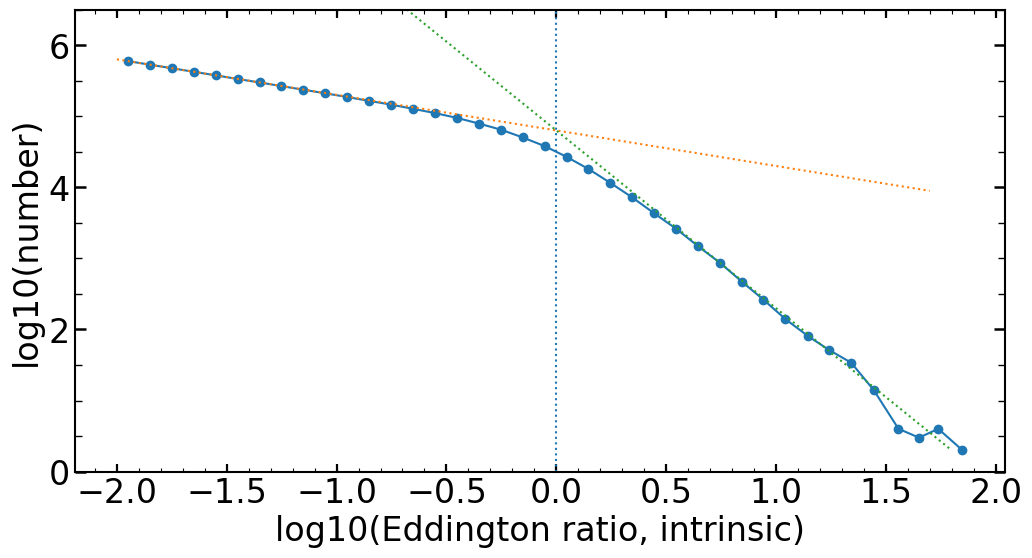

In [50]:
plt.figure(figsize=(12,6))
plt.plot(Edd_bin_len[:,0],Edd_bin_len[:,1],marker='o')
#plt.plot(Edd_bin_len_SDSS[:,0],Edd_bin_len_SDSS[:,1]-0.07,marker='o')
plt.plot(np.arange(-2,1.8,0.1),4.8-np.arange(-2,1.8,0.1)*0.5,ls=':')
plt.plot(np.arange(-2,1.9,0.1),4.8-np.arange(-2,1.9,0.1)*2.5,ls=':')
plt.xlabel('log10(Eddington ratio, intrinsic)')
plt.ylabel('log10(number)')

plt.ylim(0,6.5)
plt.axvline(0,ls=':')

### Example where SDSS selection limit below the knee

In [97]:
selection_limit=-0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)


  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

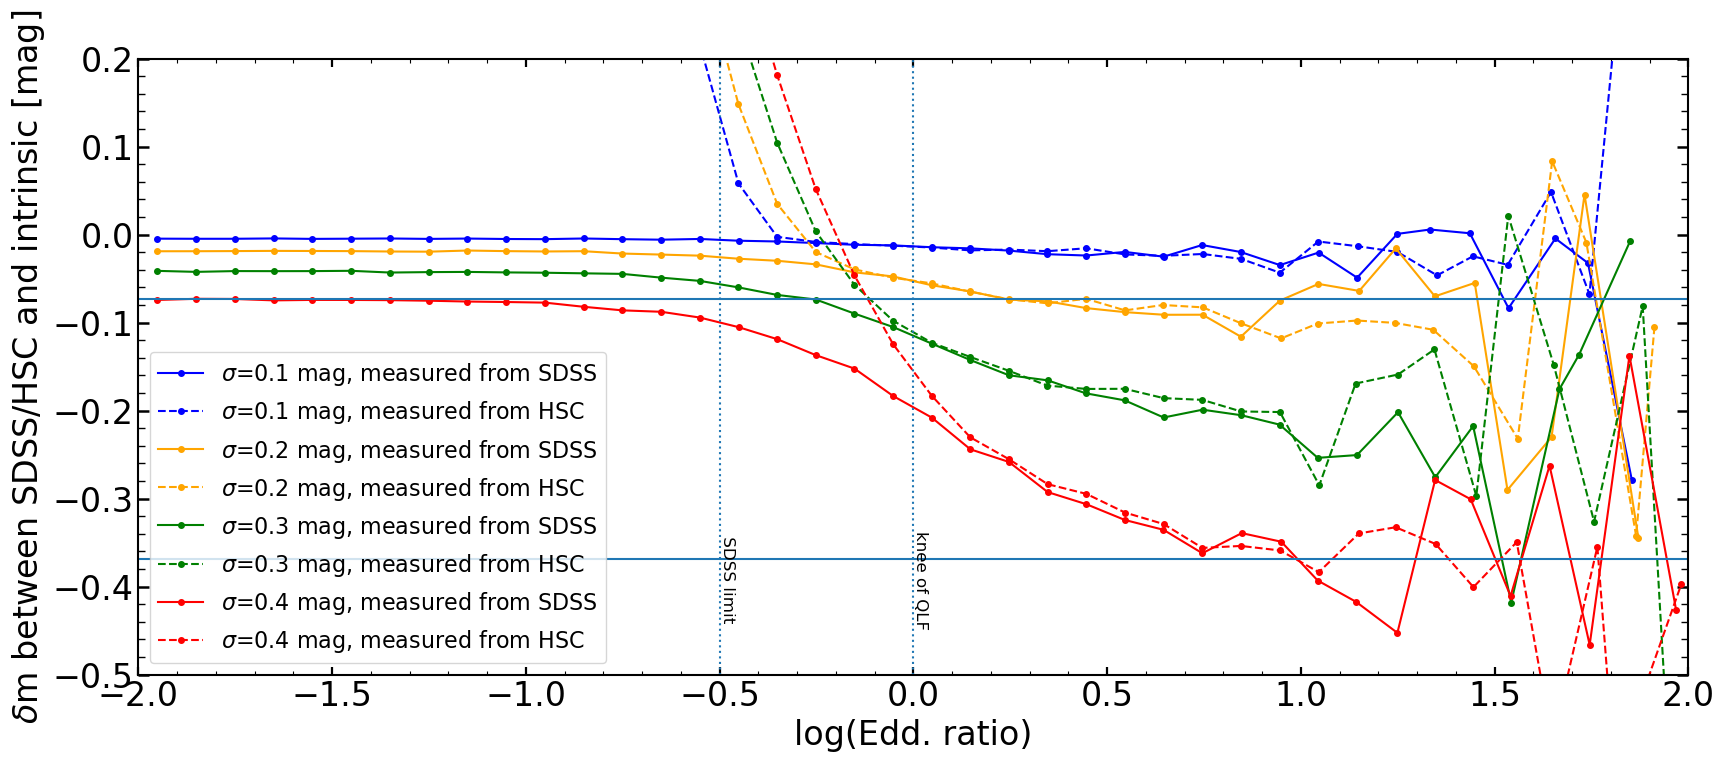

In [115]:
# to get diff. in mag multiply with 2.5 again


plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

### Example where SDSS selection limit above the knee

In [116]:
selection_limit=0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)
    
    
    #change_as_delta.append([delta,-2.5*(np.median(Edd_bin_len_SDSS[:,0]-Edd_bin_len[:,0]))])
    
#change_as_delta=np.array(change_as_delta)  

  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

(-2, 2)

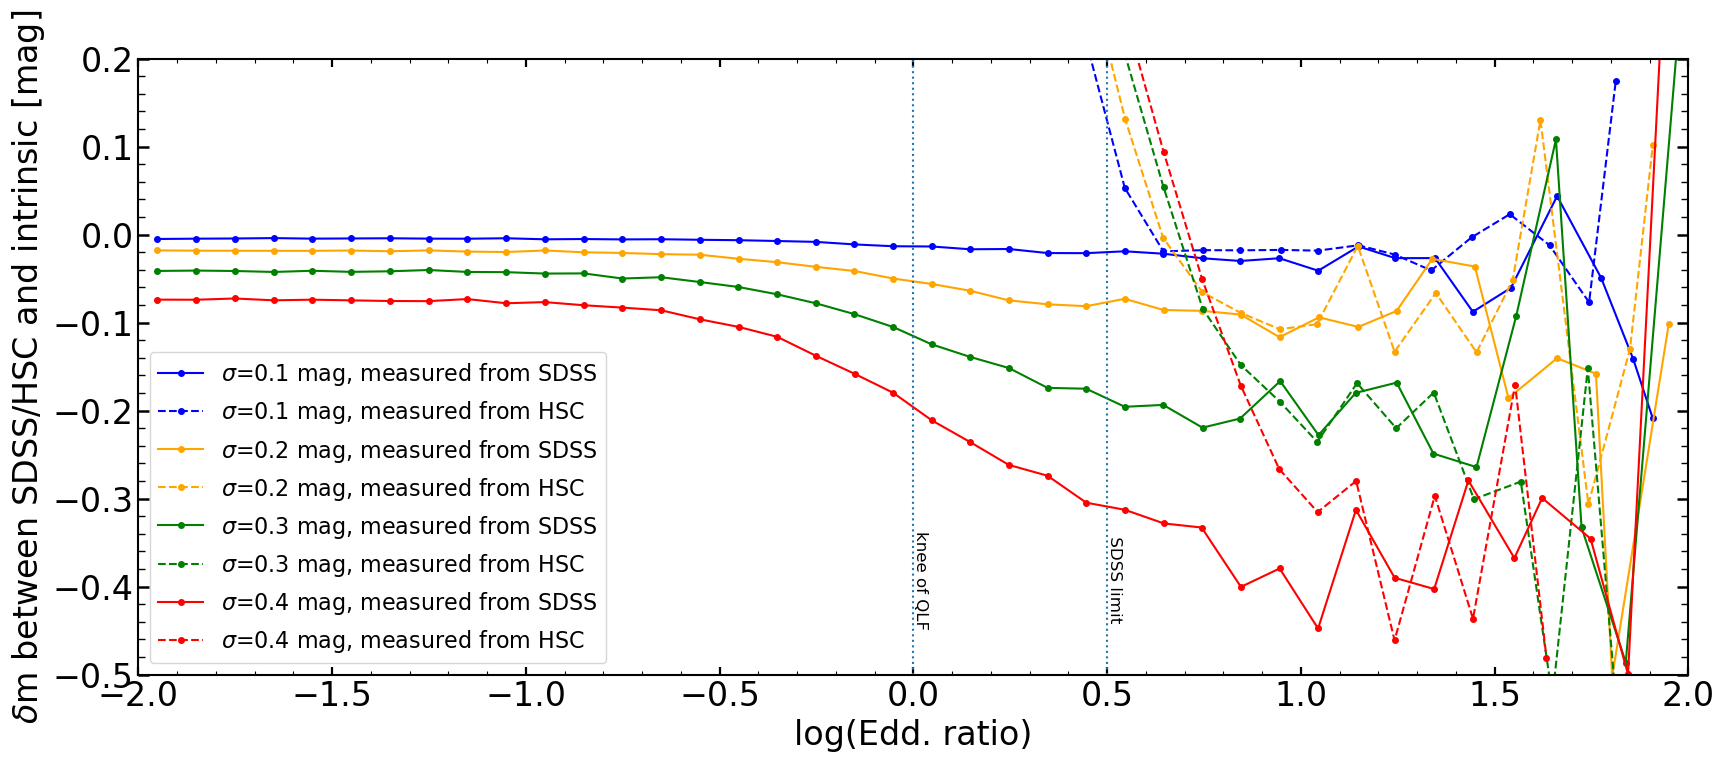

In [118]:
# to get diff. in mag multiply with 2.5 again


plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

### Example where sigma is a function of Edd.ratio

In [123]:
selection_limit=-0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta*(10**full_log_Er_curve)**(-0.25)
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta*(10**full_log_Er_curve)**(-0.25)
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)


  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

(-2, 2)

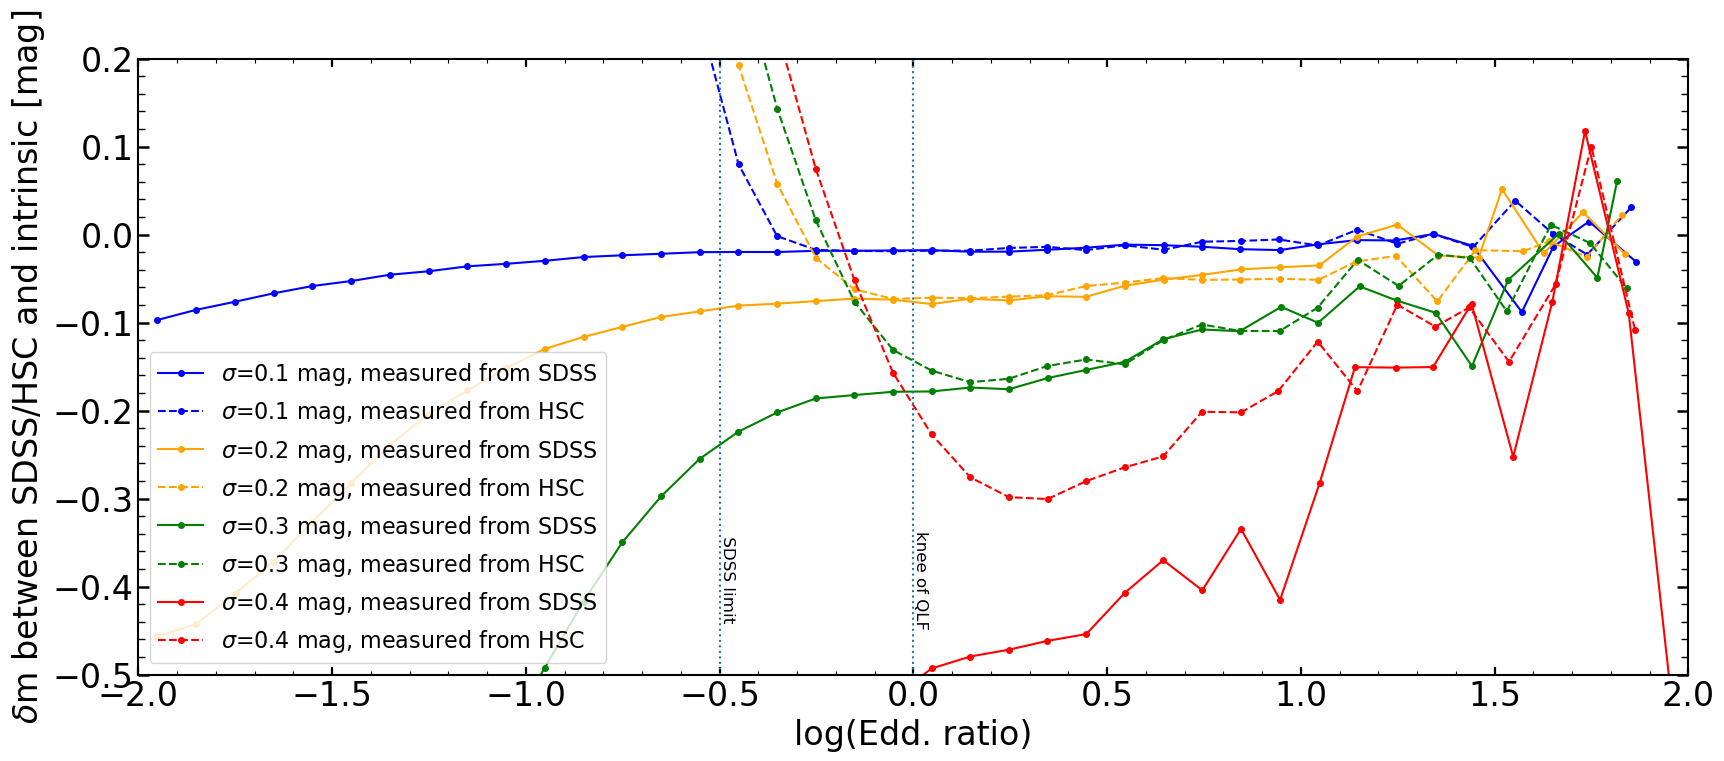

In [124]:
# to get diff. in mag multiply with 2.5 again


plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

In [122]:
(10**1)**(-0.25)

0.5623413251903491

# Reverse observations 

In [7]:
# we proceed as in the previous section. First we do the standard analysis

matched_array_filtered=np.load(DATA_DIRECTORY+'matched_array_filtered.npy',allow_pickle=True) 

res_delta_redshift_via_redshift_array_g,res_delta_redshift_via_redshift_median_array_g,\
res_delta_redshift_via_redshift_err_array_g,res_delta_redshift_via_redshift_median_err_array_g,\
res_redshift_array_g,p20_array_g,p20_median_array_g,median_mag_values_array_g=\
create_redshift_result(matched_array_filtered,100,sdss_band_column=4,difference_sdss_HSC_columns=14,return_median_mag_values=True)


p20_array_g=[]
for i in range(6):
    res_redshift_array_single_g=res_redshift_array_g[i]
    res_delta_redshift_via_redshift_array_single_g=res_delta_redshift_via_redshift_array_g[i]
    res_delta_redshift_via_redshift_err_array_single_g=res_delta_redshift_via_redshift_err_array_g[i]   
        
    p20_array_g.append(create_p20_values(res_redshift_array_single_g,res_delta_redshift_via_redshift_array_single_g,res_delta_redshift_via_redshift_err_array_single_g))

In [16]:
matched_array_filtered_inverted=np.copy(matched_array_filtered)
sdss_values=np.copy(matched_array_filtered_inverted[:,4])
hsc_values=np.copy(matched_array_filtered_inverted[:,18])
matched_array_filtered_inverted[:,4]=hsc_values
matched_array_filtered_inverted[:,18]=sdss_values

In [17]:
# We do the same analysis with our ``fake sample''
matched_array_fake_QSO=np.load(DATA_DIRECTORY+'matched_array_fake_QSO.npy')
# we verify that this sample also contains 5919 objects
print(len(matched_array_fake_QSO))

res_delta_redshift_via_redshift_fake_QSO_array_g,res_delta_redshift_via_redshift_median_fake_QSO_array_g,\
res_delta_redshift_via_redshift_fake_QSO_err_array_g,res_delta_redshift_via_redshift_median_fake_QSO_err_array_g,\
res_redshift_fake_QSO_array_g,p20_fake_QSO_array_g,p20_median_fake_QSO_array_g=\
create_redshift_result(matched_array_filtered_inverted,100,sdss_band_column=4,difference_sdss_HSC_columns=14)

p20_fake_QSO_array_g=[]
for i in range(6):
    res_redshift_array_fake_QSO_single_g=res_redshift_fake_QSO_array_g[i]
    res_delta_redshift_via_redshift_fake_QSO_array_single_g=res_delta_redshift_via_redshift_fake_QSO_array_g[i]
    res_delta_redshift_via_redshift_fake_QSO_err_array_single_g=res_delta_redshift_via_redshift_fake_QSO_err_array_g[i]   
        
    p20_fake_QSO_array_g.append(create_p20_values(res_redshift_array_fake_QSO_single_g,res_delta_redshift_via_redshift_fake_QSO_array_single_g,\
                                                  res_delta_redshift_via_redshift_fake_QSO_err_array_single_g))

5919


In [18]:
# Here we load filter redshift curves
# we make avaliable calucations with two different AGN templates
from astropy.table import Table

HSC_SDSS_filter_redshift_dependence=Table.read(DATA_DIRECTORY+'dmag_HSC_SDSS_AGN_quasar.fits')
HSC_SDSS_filter_redshift_dependence_redshift=HSC_SDSS_filter_redshift_dependence['redshift'].data

HSC_SDSS_filter_redshift_dependence_dg=HSC_SDSS_filter_redshift_dependence['dg_AGN'].data
HSC_SDSS_filter_redshift_dependence_dr=HSC_SDSS_filter_redshift_dependence['dr_AGN'].data
HSC_SDSS_filter_redshift_dependence_di=HSC_SDSS_filter_redshift_dependence['di_AGN'].data

HSC_SDSS_filter_redshift_dependence_dg_Vandenberk=HSC_SDSS_filter_redshift_dependence['dg_quasar'].data
HSC_SDSS_filter_redshift_dependence_dr_Vandenberk=HSC_SDSS_filter_redshift_dependence['dr_quasar'].data
HSC_SDSS_filter_redshift_dependence_di_Vandenberk=HSC_SDSS_filter_redshift_dependence['di_quasar'].data

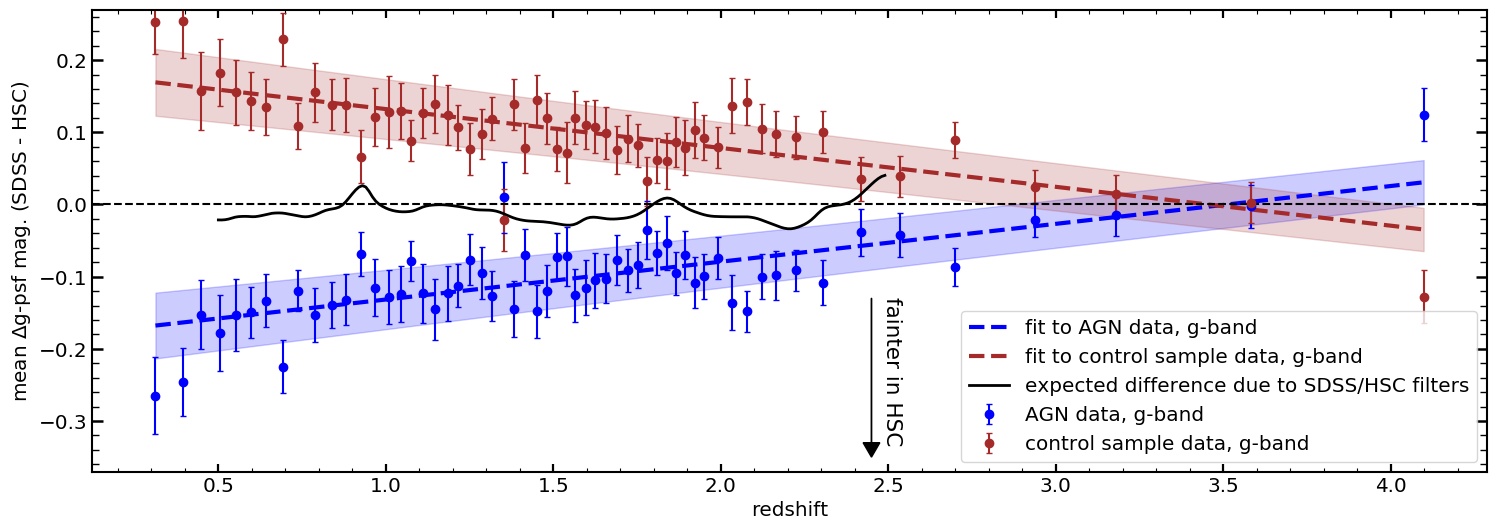

In [19]:
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(18,6))

# data points for the QSO data
plt.errorbar(res_redshift_array_g[0],res_delta_redshift_via_redshift_array_g[0],yerr=res_delta_redshift_via_redshift_err_array_g[0],\
             marker='o',capsize=2,ls='',color='blue',label='AGN data, g-band')
# data points for the nonvariable stars data
plt.errorbar(res_redshift_fake_QSO_array_g[0],res_delta_redshift_via_redshift_fake_QSO_array_g[0],yerr=res_delta_redshift_via_redshift_fake_QSO_err_array_g[0],\
             marker='o',capsize=2,ls='',color='brown',label='control sample data, g-band')

# fit and the prediction band for the QSO data
plt.plot(res_redshift_array_g[0],p20_array_g[0][0],ls='--',color='blue',lw=3,label='fit to AGN data, g-band')
plt.fill_between(res_redshift_array_g[0], p20_array_g[0][2],p20_array_g[0][1], color='blue', alpha='0.2')

# fit and the prediciton band for the nonvariable stars data
plt.plot(res_redshift_fake_QSO_array_g[0],p20_fake_QSO_array_g[0][0],ls='--',color='brown',lw=3,label='fit to control sample data, g-band')
plt.fill_between(res_redshift_fake_QSO_array_g[0], p20_fake_QSO_array_g[0][2],p20_fake_QSO_array_g[0][1],\
                 color='brown', alpha='0.2')

# filter difference between SDSS and HSC
plt.plot(HSC_SDSS_filter_redshift_dependence_redshift,-HSC_SDSS_filter_redshift_dependence_dg_Vandenberk,\
         ls='-',color='black',lw=2,label='expected difference due to SDSS/HSC filters')

plt.arrow(2.45,-0.13,-0.,-0.2,head_length=0.02,head_width=0.05,color='black')
plt.text(2.48,-0.15,'fainter in HSC',rotation=270,size=15.5)

plt.ylabel('mean $\Delta$g-psf mag. (SDSS - HSC)')
plt.xlabel('redshift')
plt.ylim(-0.37,0.27)
plt.axhline(0,color='black',ls='--')
plt.legend()

plt.savefig(FIGURES_PDF_DIRECTORY + 'Figure2_filter_and_control_sample.pdf', bbox_inches='tight')
plt.savefig(FIGURES_PNG_DIRECTORY + 'Figure2_filter_and_control_sample.png', bbox_inches='tight')

In [21]:
res_delta_redshift_via_redshift_array_g,res_delta_redshift_via_redshift_median_array_g,\
res_delta_redshift_via_redshift_err_array_g,res_delta_redshift_via_redshift_median_err_array_g,\
res_redshift_array_g,p20_array_g,p20_median_array_g,median_mag_values_array_g=\
create_redshift_result(matched_array_filtered_inverted,250,sdss_band_column=4,difference_sdss_HSC_columns=14,return_median_mag_values=True)


p20_array_g=[]
for i in range(6):
    res_redshift_array_single_g=res_redshift_array_g[i]
    res_delta_redshift_via_redshift_array_single_g=res_delta_redshift_via_redshift_array_g[i]
    res_delta_redshift_via_redshift_err_array_single_g=res_delta_redshift_via_redshift_err_array_g[i]   
        
    p20_array_g.append(create_p20_values(res_redshift_array_single_g,res_delta_redshift_via_redshift_array_single_g,res_delta_redshift_via_redshift_err_array_single_g))

    
# Here we calculate mean error of the fit to the different brightness bins
upper_limit_many=[]
lower_limit_many=[]
for i in range(1,6):
    lower_limit_single=-np.abs(p20_array_g[i][0]-p20_array_g[i][2])
    upper_limit_single=np.abs((p20_array_g[i][1]-p20_array_g[i][0]))
    upper_limit_many.append(upper_limit_single)
    lower_limit_many.append(lower_limit_single)

upper_limit_many_mean=np.mean(np.array(upper_limit_many),axis=0)
lower_limit_many_mean=np.mean(np.array(lower_limit_many),axis=0)

mean_err_single_point=np.mean([np.mean(res_delta_redshift_via_redshift_err_array_g[1]),np.mean(res_delta_redshift_via_redshift_err_array_g[2]),\
        np.mean(res_delta_redshift_via_redshift_err_array_g[3]),np.mean(res_delta_redshift_via_redshift_err_array_g[4]),\
       np.mean(res_delta_redshift_via_redshift_err_array_g[5])])

Text(0.5,0,'redshift')

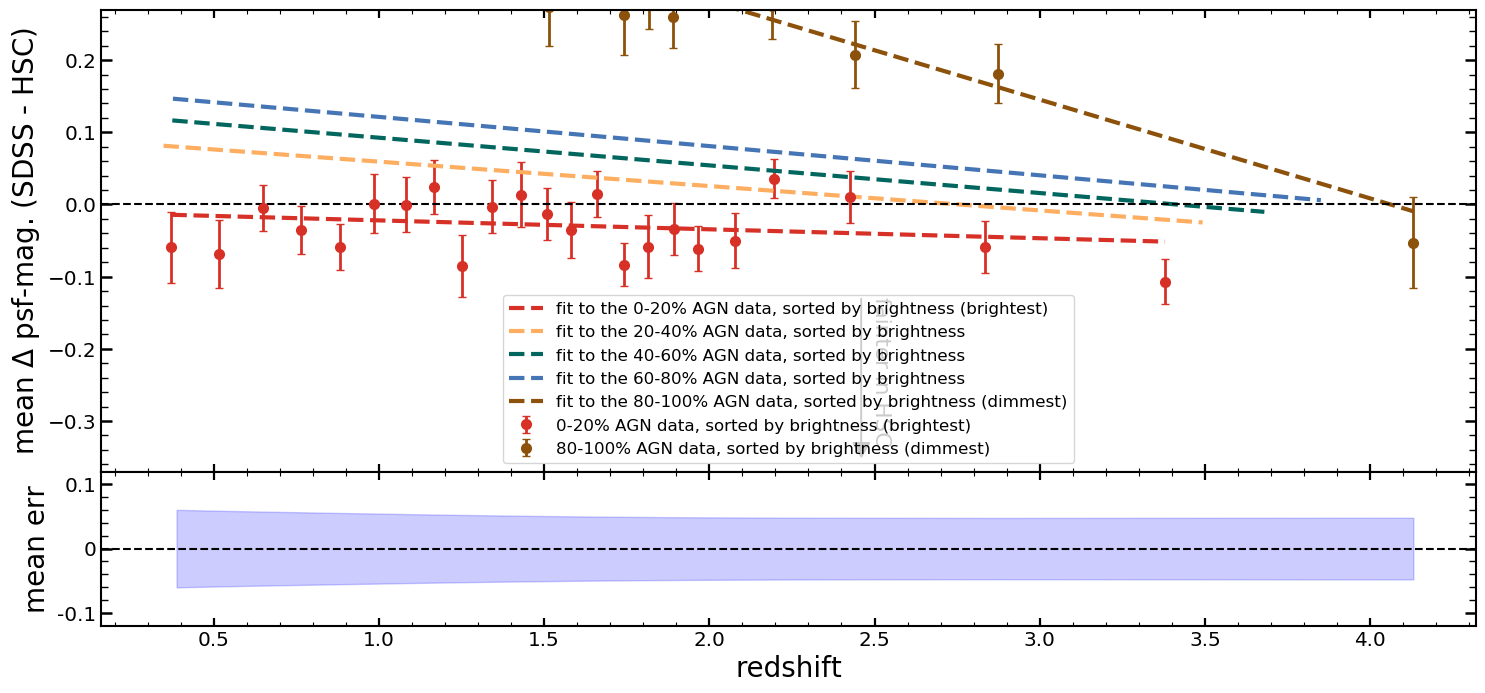

In [22]:

fig = plt.figure(figsize=(24, 8))
# Set up the axes with gridspec
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.2)
# Set up main panel
main_ax = fig.add_subplot(grid[:-1, 1:])
# Set up smaller panel which contains uncertainty
err_ax = fig.add_subplot(grid[-1, 1:], yticklabels=[-0.1,0,0.1], sharex=main_ax)

# fit to all bands
main_ax.plot(res_redshift_array_g[1],p20_array_g[1][0],ls='--',color='#d73027',alpha=1,lw=3,
             label='fit to the 0-20% AGN data, sorted by brightness (brightest)')
main_ax.plot(res_redshift_array_g[2],p20_array_g[2][0],ls='--',color='#fdae61',alpha=1,lw=3,
             label='fit to the 20-40% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[3],p20_array_g[3][0],ls='--',color='#01665e',alpha=1,lw=3,
             label='fit to the 40-60% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[4],p20_array_g[4][0],ls='--',color='#4575b4',alpha=1,lw=3,
             label='fit to the 60-80% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[5],p20_array_g[5][0],ls='--',color='#8c510a',alpha=1,lw=3,
             label='fit to the 80-100% AGN data, sorted by brightness (dimmest)')


# uncomment to see individual datapoints

main_ax.errorbar(res_redshift_array_g[1],res_delta_redshift_via_redshift_array_g[1],yerr=res_delta_redshift_via_redshift_err_array_g[1],\
             marker='o',markersize=7,elinewidth=2,ls='',color='#d73027',label='0-20% AGN data, sorted by brightness (brightest)')
#main_ax.errorbar(res_redshift_array_g[2],res_delta_redshift_via_redshift_array_g[2],yerr=res_delta_redshift_via_redshift_err_array_g[2],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#fdae61',label='20-40% AGN data, sorted by brightness')
#main_ax.errorbar(res_redshift_array_g[3],res_delta_redshift_via_redshift_array_g[3],yerr=res_delta_redshift_via_redshift_err_array_g[3],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#01665e',label='40-60% AGN data, sorted by brightness')
#main_ax.errorbar(res_redshift_array_g[4],res_delta_redshift_via_redshift_array_g[4],yerr=res_delta_redshift_via_redshift_err_array_g[4],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#4575b4',label='60-80% AGN data, sorted by brightness')
main_ax.errorbar(res_redshift_array_g[5],res_delta_redshift_via_redshift_array_g[5],yerr=res_delta_redshift_via_redshift_err_array_g[5],\
             marker='o',markersize=7,elinewidth=2,ls='',color='#8c510a',label='80-100% AGN data, sorted by brightness (dimmest)')

# uncomment in order to see uncertainty bands on the main plot

#main_ax.fill_between(res_redshift_array_g[1],p20_array_g[1][2],p20_array_g[1][1], color='#d73027', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[2],p20_array_g[2][2],p20_array_g[2][1], color='#fdae61', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[3],p20_array_g[3][2],p20_array_g[3][1], color='#01665e', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[4],p20_array_g[4][2],p20_array_g[4][1], color='#4575b4', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[5],p20_array_g[5][2],p20_array_g[5][1], color='#8c510a', alpha='0.2')

# data for the whole dataset
#main_ax.errorbar(res_redshift_array_g[0],res_delta_redshift_via_redshift_array_g[0],yerr=res_delta_redshift_via_redshift_err_array_g[0],\
#                 marker='o',capsize=2,ls='',color='blue',label='QSO data, g-band')

main_ax.set_ylabel('mean $\Delta$ psf-mag. (SDSS - HSC)',fontsize=20)
main_ax.set_xlabel('redshift',fontsize=20)
main_ax.set_ylim(-0.37,0.27)
main_ax.axhline(0,color='black',ls='--')
main_ax.legend(fontsize=12)

main_ax.arrow(2.46,-0.13,-0.,-0.2,head_length=0.02,head_width=0.05,color='black')
main_ax.text(2.49,-0.15,'fainter in HSC',rotation=270,size=15.5)

# smaller plot showing prediction bands
err_ax.fill_between(res_redshift_array_g[5],lower_limit_many_mean,upper_limit_many_mean, color='blue', alpha='0.2')

# individual prediction bands
# you can see that more luminous objects have somewhat smaller uncertanies, as expected given that AGN variability decreases as luminosity increses

#err_ax.plot(res_redshift_array_g[1],-np.abs(p20_array_g[1][0]-p20_array_g[1][2]), color='#d73027',ls='--')
#err_ax.plot(res_redshift_array_g[1],np.abs(p20_array_g[1][1]-p20_array_g[1][0]), color='#d73027', ls='--')
#err_ax.plot(res_redshift_array_g[2],-np.abs(p20_array_g[2][0]-p20_array_g[2][2]), color='#fdae61',ls='--')
#err_ax.plot(res_redshift_array_g[2],np.abs(p20_array_g[2][1]-p20_array_g[2][0]), color='#fdae61', ls='--')
#err_ax.plot(res_redshift_array_g[3],-np.abs(p20_array_g[3][0]-p20_array_g[3][2]), color='#01665e',ls='--')
#err_ax.plot(res_redshift_array_g[3],np.abs(p20_array_g[3][1]-p20_array_g[3][0]), color='#01665e', ls='--')
#err_ax.plot(res_redshift_array_g[4],-np.abs(p20_array_g[4][0]-p20_array_g[4][2]), color='#4575b4',ls='--')
#err_ax.plot(res_redshift_array_g[4],np.abs(p20_array_g[4][1]-p20_array_g[4][0]), color='#4575b4', ls='--')
#err_ax.plot(res_redshift_array_g[5],-np.abs(p20_array_g[5][0]-p20_array_g[5][2]), color='#8c510a',ls='--')
#err_ax.plot(res_redshift_array_g[5],np.abs(p20_array_g[5][1]-p20_array_g[5][0]), color='#8c510a', ls='--')

err_ax.set_ylim(-0.12,0.12)
err_ax.set_yticks([-0.1,0,0.1])
err_ax.axhline(0,color='black',ls='--')
err_ax.set_ylabel('mean err',fontsize=20)
err_ax.set_xlabel('redshift',fontsize=20)